# Importar librerías

In [350]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

from itertools import combinations
from sklearn.cluster import KMeans,MeanShift
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Cargar dataset

In [351]:
df = pd.read_csv("players_22.csv")

C:\Users\Joaquin\AppData\Local\Temp\ipykernel_13328\213607986.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("players_22.csv")


# Análisis exploratorio de la base

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [353]:
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [354]:
col_groups = df.columns.to_series().groupby(df.dtypes).groups
group_types = {k.name: v.tolist() for k, v in col_groups.items()}

group_types

{'int64': ['sofifa_id',
  'overall',
  'potential',
  'age',
  'height_cm',
  'weight_kg',
  'nationality_id',
  'weak_foot',
  'skill_moves',
  'international_reputation',
  'attacking_crossing',
  'attacking_finishing',
  'attacking_heading_accuracy',
  'attacking_short_passing',
  'attacking_volleys',
  'skill_dribbling',
  'skill_curve',
  'skill_fk_accuracy',
  'skill_long_passing',
  'skill_ball_control',
  'movement_acceleration',
  'movement_sprint_speed',
  'movement_agility',
  'movement_reactions',
  'movement_balance',
  'power_shot_power',
  'power_jumping',
  'power_stamina',
  'power_strength',
  'power_long_shots',
  'mentality_aggression',
  'mentality_interceptions',
  'mentality_positioning',
  'mentality_vision',
  'mentality_penalties',
  'mentality_composure',
  'defending_marking_awareness',
  'defending_standing_tackle',
  'defending_sliding_tackle',
  'goalkeeping_diving',
  'goalkeeping_handling',
  'goalkeeping_kicking',
  'goalkeeping_positioning',
  'goalke

In [355]:
group_types["float64"]

['value_eur',
 'wage_eur',
 'club_team_id',
 'league_level',
 'club_jersey_number',
 'club_contract_valid_until',
 'nation_team_id',
 'nation_jersey_number',
 'release_clause_eur',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'goalkeeping_speed']

In [356]:
group_types["object"]

['player_url',
 'short_name',
 'long_name',
 'player_positions',
 'dob',
 'club_name',
 'league_name',
 'club_position',
 'club_loaned_from',
 'club_joined',
 'nationality_name',
 'nation_position',
 'preferred_foot',
 'work_rate',
 'body_type',
 'real_face',
 'player_tags',
 'player_traits',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb',
 'gk',
 'player_face_url',
 'club_logo_url',
 'club_flag_url',
 'nation_logo_url',
 'nation_flag_url']

In [357]:
numerical_cols = group_types["float64"] + group_types["int64"]

In [358]:
df["club_position"].unique()

array(['RW', 'ST', 'LW', 'RCM', 'GK', 'CF', 'CDM', 'LCB', 'RDM', 'RS',
       'LCM', 'SUB', 'CAM', 'RCB', 'LDM', 'LB', 'RB', 'LM', 'RM', 'LS',
       'CB', 'RES', nan, 'RWB', 'RF', 'CM', 'LWB', 'LAM', 'LF', 'RAM'],
      dtype=object)

In [359]:
df["is_gk"] = df["club_position"] == 'GK'

# Diagramas de dispersión

In [360]:
group_types["float64"]+["is_gk"]

['value_eur',
 'wage_eur',
 'club_team_id',
 'league_level',
 'club_jersey_number',
 'club_contract_valid_until',
 'nation_team_id',
 'nation_jersey_number',
 'release_clause_eur',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'goalkeeping_speed',
 'is_gk']

In [361]:
# sns.pairplot(df[group_types["float64"]+["is_gk"]], hue="is_gk")

In [362]:
correlations = df[numerical_cols].corr()

In [363]:
class Correlation:
    def __init__(self, name_var_1, name_var_2, correlation):
        self.name_var_1 = name_var_1
        self.name_var_2 = name_var_2
        self.correlation = correlation

    def is_very_high(self):
        return abs(self.correlation) >= 0.8
    
    def is_high(self):
        return 0.8 > abs(self.correlation) >= 0.6

    def print(self):
        print(f"Las variables {self.name_var_1} y {self.name_var_2} tienen una correlación de {self.correlation}")

In [364]:
combinations_columns = list(combinations(numerical_cols, r=2))

In [365]:
combinations_columns

[('value_eur', 'wage_eur'),
 ('value_eur', 'club_team_id'),
 ('value_eur', 'league_level'),
 ('value_eur', 'club_jersey_number'),
 ('value_eur', 'club_contract_valid_until'),
 ('value_eur', 'nation_team_id'),
 ('value_eur', 'nation_jersey_number'),
 ('value_eur', 'release_clause_eur'),
 ('value_eur', 'pace'),
 ('value_eur', 'shooting'),
 ('value_eur', 'passing'),
 ('value_eur', 'dribbling'),
 ('value_eur', 'defending'),
 ('value_eur', 'physic'),
 ('value_eur', 'goalkeeping_speed'),
 ('value_eur', 'sofifa_id'),
 ('value_eur', 'overall'),
 ('value_eur', 'potential'),
 ('value_eur', 'age'),
 ('value_eur', 'height_cm'),
 ('value_eur', 'weight_kg'),
 ('value_eur', 'nationality_id'),
 ('value_eur', 'weak_foot'),
 ('value_eur', 'skill_moves'),
 ('value_eur', 'international_reputation'),
 ('value_eur', 'attacking_crossing'),
 ('value_eur', 'attacking_finishing'),
 ('value_eur', 'attacking_heading_accuracy'),
 ('value_eur', 'attacking_short_passing'),
 ('value_eur', 'attacking_volleys'),
 ('val

In [366]:

high_correlations = []

for pair in combinations_columns:
    if(pair[0] != pair[1]):
        correlation = Correlation(pair[0], pair[1], correlations[pair[0]][pair[1]])
        if(correlation.is_very_high()):
            high_correlations.append(correlation)

# Preprocesamiento

## Imputación de valores faltantes

In [367]:

knn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df[numerical_cols] = knn_imputer.fit_transform(df[numerical_cols])

C:\Users\Joaquin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


## Estandarización de variables numéricas

In [368]:
scaler = StandardScaler()

standarized_df = df.copy()

standarized_df[numerical_cols] = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=df[numerical_cols].columns)


# Clustering

## K-Means

In [369]:
# Número de clusters buscado
n_clust = 3

km = KMeans(n_clusters=n_clust)
km.fit(standarized_df[group_types["int64"]])

# Etiquetas asignadas por el algoritmo
standarized_df["km_cluster"] = km.labels_


In [385]:
standarized_df["club_name"]

0        Paris Saint-Germain
1          FC Bayern München
2          Manchester United
3        Paris Saint-Germain
4            Manchester City
                ...         
19234               Wuhan FC
19235             Derry City
19236             Finn Harps
19237             Finn Harps
19238    NorthEast United FC
Name: club_name, Length: 19239, dtype: object

In [390]:
standarized_df[standarized_df["club_name"] == "NorthEast United FC"][["short_name", "km_cluster"]]

,short_name,km_cluster
8853,Hernán,0
10078,D. Brown,0
16512,S. Roy,2
16997,G. Kumar,1
17268,VP Suhair,1
17644,M. Shereef,1
17869,P. Lakra,1
17907,L. Ralte,1
18145,S. Singh,1
18291,M. Irshad,1


# Embedding

## PCA

In [371]:
pca = PCA(n_components=4)
pca.fit(standarized_df[group_types["int64"]])

PCA(n_components=4)

In [372]:
pca.explained_variance_ratio_

array([0.466128  , 0.12100746, 0.10820932, 0.05030938])

In [373]:
pca.transform(standarized_df[group_types["int64"]])

array([[-10.19820308,  -1.44873066,   9.51774382,  -2.67865776],
       [ -9.13642022,   1.25555091,   8.97522289,   0.19196361],
       [ -9.67537314,   1.31375031,  11.37381009,   0.20141778],
       ...,
       [  2.44568062,  -1.68436978,  -3.75839242,   0.99232876],
       [  3.10909921,  -5.04127906,  -2.75141922,   0.95795932],
       [  1.96115342,  -3.38725675,  -3.99171017,  -1.05616315]])

In [374]:
pca_df = pd.DataFrame(data = pca.transform(standarized_df[group_types["int64"]]), columns=["pc1", "pc2", "pc3", "pc4"])

In [375]:
standarized_df["pc1"] = pca_df["pc1"]
standarized_df["pc2"] = pca_df["pc2"]
standarized_df["pc3"] = pca_df["pc3"]
standarized_df["pc4"] = pca_df["pc4"]

<AxesSubplot:xlabel='pc1', ylabel='pc3'>

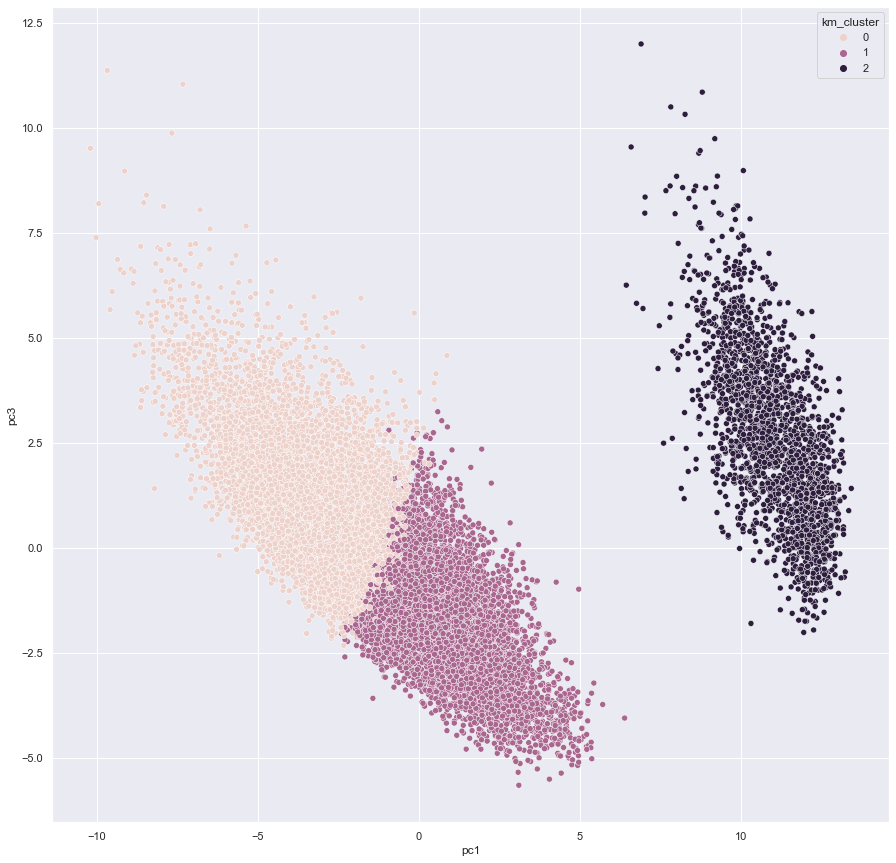

In [376]:

sns.set(rc={'figure.figsize':(15,15)})
sns.scatterplot(data=standarized_df, x="pc1", y="pc3", hue="km_cluster")

## T-SNE